**Importing Files**

In [ ]:
from google.colab import files

# Upload files from your local machine
uploaded = files.upload()

# List uploaded files
print("Uploaded files:", uploaded.keys())


Saving processed_logistics_data.csv to processed_logistics_data.csv
Uploaded files: dict_keys(['processed_logistics_data.csv'])


In [ ]:
from google.colab import files

# Upload multiple files from your local machine
uploaded = files.upload()

# Display the uploaded files
print("Uploaded files:", uploaded.keys())


Saving pca_results (3).csv to pca_results (3).csv
Uploaded files: dict_keys(['pca_results (3).csv'])


In [ ]:
from google.colab import files

# Upload multiple files from your local machine
uploaded = files.upload()

# Display the uploaded files
print("Uploaded files:", uploaded.keys())


Saving cleaned_and_engineered_logistics_data.csv to cleaned_and_engineered_logistics_data.csv
Uploaded files: dict_keys(['cleaned_and_engineered_logistics_data.csv'])


** Load Uploaded Files**

In [ ]:
# Import necessary llibrariesibraries
import pandas as pd

# Load each file into a pandas DataFrame
# Replace filenames with the keys of uploadeuploadedd files
processed_data = pd.read_csv("processed_logistics_data.csv")
pca_results = pd.read_csv("pca_results (3).csv")
cleaned_data = pd.read_csv('cleaned_and_engineered_logistics_data.csv')

# Display summaries of the datasets
print("Processed Data:")
print(processed_data.info())
print("\nPCA Results:")
print(pca_results.info())
print("\nCleaned Data:")
print(cleaned_data.info())


Processed Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            227 non-null    object 
 1   trip_creation_time              227 non-null    object 
 2   route_schedule_uuid             227 non-null    object 
 3   route_type                      227 non-null    object 
 4   trip_uuid                       227 non-null    object 
 5   source_center                   227 non-null    object 
 6   source_name                     227 non-null    object 
 7   destination_center              227 non-null    object 
 8   destination_name                227 non-null    object 
 9   od_start_time                   227 non-null    object 
 10  od_end_time                     227 non-null    object 
 11  start_scan_to_end_scan          227 non-null    float64
 12  is_cutoff           

** Step1 Data Integration & Identify the Target Column:**

Combine relevant features from the three datasets into a single feature matrix (X) and define the target variable (y).

Based on the dataset, we’ll use actual_time as the target column

In [ ]:
# Define the target column (update if a different column is the target)
target_column = 'actual_time'

# Combine features from the datasets (drop target only where it exists)
X = pd.concat([
    processed_data.drop(columns=[target_column]),
    pca_results,
    cleaned_data.drop(columns=[target_column], errors='ignore')  # Ignore missing target column
], axis=1)

# Define the target variable
y = processed_data[target_column]  # Use the target column from processed_data

# Check the combined dataset shape
print(f"Combined Feature Matrix Shape: {X.shape}")
print(f"Target Variable Shape: {y.shape}")


Combined Feature Matrix Shape: (227, 135)
Target Variable Shape: (227,)


**Verify Column Alignment**

Ensure all datasets have the same number of rows:

In [ ]:
# Check if the number of rows aligns across all datasets
print(f"Processed Data Rows: {processed_data.shape[0]}")
print(f"PCA Results Rows: {pca_results.shape[0]}")
print(f"Cleaned Data Rows: {cleaned_data.shape[0]}")

# If row counts differ, align them
if not (processed_data.shape[0] == pca_results.shape[0] == cleaned_data.shape[0]):
    raise ValueError("Row counts across datasets do not match!")


Processed Data Rows: 227
PCA Results Rows: 227
Cleaned Data Rows: 227


** Data Validation**

Perform checks to ensure data integrity.

In [ ]:
# Check for missing values
print("\nMissing Values in Combined Features:")
print(X.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows in Combined Features:")
print(X.duplicated().sum())



Missing Values in Combined Features:
data                                  0
trip_creation_time                    0
route_schedule_uuid                   0
route_type                            0
trip_uuid                             0
                                     ..
segment_factor trip_creation_month    0
trip_duration trip_creation_month     0
actual_distance_scaled                0
pca_one                               0
pca_two                               0
Length: 135, dtype: int64

Duplicate Rows in Combined Features:
0


**Step2 Proceed with Train-Test Splitting**
----------------------------

Once the feature matrix (X) and target variable (y) are prepared, proceed with splitting:

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the splits
print("\nTrain-Test Split:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



Train-Test Split:
X_train shape: (181, 135), y_train shape: (181,)
X_test shape: (46, 135), y_test shape: (46,)


**Saving Train-Test Splits**

You can save the X_train, X_test, y_train, and y_test as CSV files and download them directly to your local machine.

In [ ]:
# Save Train-Test Splits as CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Train-Test Splits saved as CSV files.")


Train-Test Splits saved as CSV files.


**Downloading Files to Local Machine**

In [ ]:
from google.colab import files

# Download the Train-Test Split files
files.download('X_train.csv')
files.download('X_test.csv')
files.download('y_train.csv')
files.download('y_test.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Saving Additional Process Outcomes**

If you want to save the combined feature matrix (X) and target variable (y), you can do so as follows:

In [ ]:
# Save the combined feature matrix and target variable
X.to_csv('combined_features.csv', index=False)
y.to_csv('target_variable.csv', index=False)

print("Combined features and target variable saved as CSV files.")


Combined features and target variable saved as CSV files.


**Code to Download Combined Data:**


In [ ]:
# Download the combined feature matrix and target variable
files.download('combined_features.csv')
files.download('target_variable.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step3. Baseline Modeling**
----------------------------


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = 'cleaned_and_engineered_logistics_data.csv'
data = pd.read_csv(file_path)

# Define the target variable and features
target_column = 'segment_actual_time'  # Specify the target variable
X = data.drop(columns=[target_column], errors='ignore')
y = data[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred = baseline_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the results
print("Baseline Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Save the metrics to a text file
metrics_text = f"Baseline Model Performance Metrics:\n"
metrics_text += f"Mean Absolute Error (MAE): {mae:.4f}\n"
metrics_text += f"Root Mean Squared Error (RMSE): {rmse:.4f}\n"
metrics_text += f"R² Score: {r2:.4f}\n"

with open('baseline_metrics.txt', 'w') as file:
    file.write(metrics_text)

# Download the baseline metrics file
files.download('baseline_metrics.txt')

Baseline Model Performance Metrics:
Mean Absolute Error (MAE): 0.0019
Root Mean Squared Error (RMSE): 0.0087
R² Score: 0.9998


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Upload multiple files from your local machine
uploaded = files.upload()

# Display the uploaded files
print("Uploaded files:", uploaded.keys())

KeyboardInterrupt: 

**Step4 Advanced Modelling**
----------------------------

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('cleaned_and_engineered_logistics_data.csv')

In [ ]:
df.head()

,start_scan_to_end_scan,delay_flag,cutoff_factor,trip_distance,estimated_time,estimated_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,...,segment_osrm_time trip_creation_month,segment_osrm_distance segment_factor,segment_osrm_distance trip_duration,segment_osrm_distance trip_creation_month,segment_factor trip_duration,segment_factor trip_creation_month,trip_duration trip_creation_month,actual_distance_scaled,pca_one,pca_two
0,86.0,1.0,2.302585,0.003103,2.484907,0.003786,1.272727,2.708050,2.484907,2.562277,...,5.721709,2.103579,0.068025,5.899860,0.021796,1.890378,0.061131,0.004477,-3559.909851,84.177915
1,86.0,1.0,2.944439,0.022490,3.044522,0.021799,1.200000,2.397895,2.302585,2.375743,...,5.301898,1.775189,0.063073,5.470350,0.019838,1.720525,0.061131,0.032446,-3528.320189,47.482577
2,86.0,1.0,3.332205,0.041949,3.367296,0.041389,1.428571,2.833213,2.079442,2.469387,...,4.788091,2.937543,0.065559,5.685973,0.031582,2.739119,0.061131,0.060520,-3477.888439,73.842394
3,86.0,1.0,3.610918,0.060560,3.713572,0.064480,1.550000,3.091042,2.564949,2.640656,...,5.906014,2.671290,0.070106,6.080335,0.026857,2.329297,0.061131,0.087369,-3424.295822,57.292437
4,86.0,0.0,3.688879,0.067640,3.806662,0.079538,1.545455,1.945910,1.791759,1.592353,...,4.125679,1.255502,0.042275,3.666528,0.020932,1.815490,0.061131,0.097583,-3512.392318,0.003305


#4. Advanced Modeling
##Task 1: Feature Selection

#Lasso Regularization for Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Assuming 'df' is your DataFrame and the target variable is 'target_column'
target_column = 'your_target_column_name'  # Replace with the name of your target column

# Separate features (X) and target (y)
X = df.drop(columns=['segment_actual_time'])
y = df['segment_actual_time']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Lasso model
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Extract important features
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
important_features = lasso_coefficients[lasso_coefficients != 0].index.tolist()

print("Important Features Selected by Lasso:", important_features)

# Evaluate model performance (Optional)
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


NameError: name 'df' is not defined

In [ ]:
important_features

['segment_actual_time.1', 'segment_actual_time trip_creation_month']

#Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import pandas as pd


rf_model = RandomForestRegressor(random_state=42)

n_features_to_select = 10

rfe = RFE(estimator=rf_model, n_features_to_select=n_features_to_select)
rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", list(selected_features))

# Ranking of all features
feature_rankings = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rfe.ranking_
}).sort_values(by="Ranking")

print("Feature Rankings:\n", feature_rankings)


Selected Features by RFE: ['segment_actual_time.1', 'segment_osrm_distance.1', 'cutoff_factor segment_actual_time', 'estimated_time segment_actual_time', 'segment_actual_time segment_osrm_time', 'segment_actual_time segment_osrm_distance', 'segment_actual_time segment_factor', 'segment_actual_time trip_creation_month', 'segment_osrm_time segment_factor', 'segment_osrm_distance segment_factor']
Feature Rankings:
                                       Feature  Ranking
89  segment_actual_time segment_osrm_distance        1
90         segment_actual_time segment_factor        1
92    segment_actual_time trip_creation_month        1
94           segment_osrm_time segment_factor        1
19                      segment_actual_time.1        1
..                                        ...      ...
46                   delay_flag trip_duration       93
13                               delay_flag.1       94
3                               trip_distance       95
11                        trip_cre

#ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - loss: 81684.1250 - val_loss: 15152.9658
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 18182.5273 - val_loss: 8327.1318
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8276.1025 - val_loss: 6722.6953
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8103.9639 - val_loss: 3376.6777
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2834.8308 - val_loss: 1635.1890
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3815.1089 - val_loss: 1629.6038
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1686.9019 - val_loss: 1247.7592
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1472.6671 - val_loss: 928.7396
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1349.7634 - val_loss: 959.2154
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 948.3614 - val_loss: 781.5451
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 671.9709 - val_loss: 737.9615
Epoch 12/50
5/5 ━━━━━━

##Task 3: Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import lightgbm as lgb

xgb_model = xgb.XGBRegressor()
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Randomized Search for XGBoost
xgb_random_search = RandomizedSearchCV(xgb_model, param_distributions=xgb_param_grid,
                                        n_iter=10, scoring='neg_mean_squared_error',
                                        cv=3, verbose=1, random_state=42)
xgb_random_search.fit(X_train, y_train)

print("Best parameters for XGBoost:", xgb_random_search.best_params_)
print("Best score for XGBoost:", -xgb_random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best score for XGBoost: 0.01840766309077053


In [ ]:
BEST = xgb_random_search.best_estimator_

In [ ]:
y_pred_xgb = BEST.predict(X_test)

In [ ]:
mbe_xgb = mean_absolute_error(y_test,y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test,y_pred_xgb))
score_xgb = r2_score(y_test,y_pred_xgb)

In [ ]:
mbe_xgb,rmse_xgb,score_xgb

(0.017492314318236855, 0.04767767119077575, 0.9925143325627381)

In [ ]:
lgb_model = lgb.LGBMRegressor()
lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100]
}

lgb_random_search = RandomizedSearchCV(lgb_model, param_distributions=lgb_param_grid,
                                        n_iter=10, scoring='neg_mean_squared_error',
                                        cv=3, verbose=1, random_state=42)
lgb_random_search.fit(X_train, y_train)

print("Best parameters for LightGBM:", lgb_random_search.best_params_)
print("Best score for LightGBM:", -lgb_random_search.best_score_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
BEST2 =lgb_random_search.best_estimator_

In [ ]:
y_pred_lgb = BEST2.predict(X_test)

In [ ]:
mbe_lgb = mean_absolute_error(y_test,y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
score_lgb = r2_score(y_test,y_pred_lgb)

In [ ]:
mbe_lgb,rmse_xgb,score_lgb

(0.1012273264957366, 0.04767767119077575, 0.9323081717604067)

** Step5 Cross Validation**
----------------------------
Perform K-Fold Cross-Validation (5 or 10 folds) to ensure model robustness.
Document the cross-validated performance metrics.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as n

**Initialize the Model**

Choose a regression model for cross-validation. Here, we use Linear Regression:

In [ ]:
# Initialize the model
model = LinearRegression()


**Set Up K-Fold Cross-Validation**

Use KFold to define the number of folds (e.g., 5 or 10 folds):

In [ ]:
# Define K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)


NameError: name 'KFold' is not defined

**Perform Cross-Validation**

Evaluate the model using cross_val_score with Mean Absolute Error (MAE):

In [ ]:
# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert negative scores to positive
cv_scores = -cv_scores


** Document Performance Metrics**

Summarize the results of cross-validation:

In [ ]:
# Calculate and print metrics
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print("Cross-Validation Scores (MAE):", cv_scores)
print(f"Mean CV MAE: {mean_cv_score:.4f}")
print(f"Standard Deviation of CV MAE: {std_cv_score:.4f}")


Cross-Validation Scores (MAE): [1.90584552e-03 4.89289662e-05 1.38697759e-05 1.50333724e-04
 2.68878260e-05]
Mean CV MAE: 0.0004
Standard Deviation of CV MAE: 0.0007


**Additional Metrics (Optional)**

If you'd like to evaluate additional metrics, such as Root Mean Squared Error (RMSE) or R², customize the scoring parameter in cross_val_score:

In [ ]:
# Example: Evaluate R²
cv_r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print("Cross-Validation Scores (R²):", cv_r2_scores)
print(f"Mean CV R²: {np.mean(cv_r2_scores):.4f}")


Cross-Validation Scores (R²): [0.99975055 0.9999999  0.99999998 0.99999846 0.99999995]
Mean CV R²: 0.9999


**Saving Results to Document Performance**

Save Cross-Validation Results
Save the scores as a CSV file:

In [ ]:
import pandas as pd

# Create a DataFrame for cross-validation results
cv_results = pd.DataFrame({
    'Fold': range(1, len(cv_scores) + 1),
    'MAE': cv_scores
})

# Save to CSV
cv_results.to_csv('cross_validation_results.csv', index=False)
print("Cross-validation results saved to 'cross_validation_results.csv'.")


Cross-validation results saved to 'cross_validation_results.csv'.


**Download Results Locally**

Use this code in Google Colab to download the results:

In [ ]:
from google.colab import files
files.download('cross_validation_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step7 Ensemble Modeling**
----------------------------
Ensemble methods combine multiple models to improve predictive performance. For your task, we’ll implement Model Averaging and Stacking and compare their results with individual models.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import numpy as np


** Define Individual Models**

Start with the base models for ensemble learning:

In [ ]:
# Define base models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


**Model Averaging**

Perform Model Averaging by calculating the average of predictions from individual models:

In [ ]:
# Fit individual models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Get predictions from individual models
linear_preds = linear_model.predict(X_test)
ridge_preds = ridge_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Average predictions
ensemble_preds_avg = (linear_preds + ridge_preds + rf_preds) / 3

# Evaluate averaged ensemble predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_avg = mean_absolute_error(y_test, ensemble_preds_avg)
rmse_avg = np.sqrt(mean_squared_error(y_test, ensemble_preds_avg))
r2_avg = r2_score(y_test, ensemble_preds_avg)

print("\nModel Averaging Results:")
print(f"MAE: {mae_avg:.4f}, RMSE: {rmse_avg:.4f}, R²: {r2_avg:.4f}")



Model Averaging Results:
MAE: 0.0091, RMSE: 0.0143, R²: 0.9993


**Stacking**

Use Stacking to combine models by training a meta-model on the predictions of base models:

In [ ]:
# Define a Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('linear', linear_model),
        ('ridge', ridge_model),
        ('random_forest', rf_model)
    ],
    final_estimator=LinearRegression()  # Meta-model
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Get predictions and evaluate
stacking_preds = stacking_model.predict(X_test)

mae_stack = mean_absolute_error(y_test, stacking_preds)
rmse_stack = np.sqrt(mean_squared_error(y_test, stacking_preds))
r2_stack = r2_score(y_test, stacking_preds)

print("\nStacking Results:")
print(f"MAE: {mae_stack:.4f}, RMSE: {rmse_stack:.4f}, R²: {r2_stack:.4f}")



Stacking Results:
MAE: 0.0021, RMSE: 0.0087, R²: 0.9998


**Compare Results**

Print a comparison of results from individual models, averaging, and stacking:

In [ ]:
# Evaluate individual models for comparison
linear_mae = mean_absolute_error(y_test, linear_preds)
ridge_mae = mean_absolute_error(y_test, ridge_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)

print("\nComparison of Models:")
print(f"Linear Regression MAE: {linear_mae:.4f}")
print(f"Ridge Regression MAE: {ridge_mae:.4f}")
print(f"Random Forest MAE: {rf_mae:.4f}")
print(f"Model Averaging MAE: {mae_avg:.4f}")
print(f"Stacking MAE: {mae_stack:.4f}")



Comparison of Models:
Linear Regression MAE: 0.0019
Ridge Regression MAE: 0.0145
Random Forest MAE: 0.0184
Model Averaging MAE: 0.0091
Stacking MAE: 0.0021


**Save Results**

Save the predictions and performance metrics for documentation:

In [ ]:
import pandas as pd

# Create a DataFrame of results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest', 'Model Averaging', 'Stacking'],
    'MAE': [linear_mae, ridge_mae, rf_mae, mae_avg, mae_stack],
    'RMSE': [np.sqrt(mean_squared_error(y_test, linear_preds)),
             np.sqrt(mean_squared_error(y_test, ridge_preds)),
             np.sqrt(mean_squared_error(y_test, rf_preds)),
             rmse_avg, rmse_stack],
    'R²': [r2_score(y_test, linear_preds),
           r2_score(y_test, ridge_preds),
           r2_score(y_test, rf_preds),
           r2_avg, r2_stack]
})

# Save the results
results.to_csv('ensemble_results.csv', index=False)
print("\nResults saved to 'ensemble_results.csv'.")



Results saved to 'ensemble_results.csv'.


**Save Results to Local Machine**
Save Results File
Ensure the results file (e.g., ensemble_results.csv) is saved:

In [ ]:
# Save the ensemble results to a CSV file
results.to_csv('ensemble_results.csv', index=False)
print("Results saved as 'ensemble_results.csv'.")


Results saved as 'ensemble_results.csv'.


**Download Results File**

Use the files.download() function to download the file:

In [ ]:
from google.colab import files

# Download the results file
files.download('ensemble_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Save and Download the Best Model**

Save the Best Model
Use joblib or pickle to save the best-performing model (e.g., Stacking):

In [ ]:
import joblib

# Save the stacking model as a file
joblib.dump(stacking_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'.")


NameError: name 'stacking_model' is not defined

** Download the Best Model**

Use files.download() to download the model file:

In [ ]:
# Download the best model
files.download('best_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Performance Documentation**


Summarize Model Performance Metrics
Code for Performance Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Calculate performance metrics for train and test sets
train_preds = stacking_model.predict(X_train)
test_preds = stacking_model.predict(X_test)

# Metrics for Train Set
train_mae = mean_absolute_error(y_train, train_preds)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
train_r2 = r2_score(y_train, train_preds)

# Metrics for Test Set
test_mae = mean_absolute_error(y_test, test_preds)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
test_r2 = r2_score(y_test, test_preds)

# Summarize results
metrics_summary = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "MAE": [train_mae, test_mae],
    "RMSE": [train_rmse, test_rmse],
    "R²": [train_r2, test_r2]
})

# Print and save the summary
print("Performance Metrics Summary:")
print(metrics_summary)

metrics_summary.to_csv('performance_metrics_summary.csv', index=False)


Performance Metrics Summary:
  Dataset       MAE      RMSE        R²
0   Train  0.000245  0.000252  1.000000
1    Test  0.002114  0.008670  0.999752


** Analyze Feature Importance**

For feature importance, use tree-based models like Random Forest or Gradient Boosting.

Code for Feature Importance

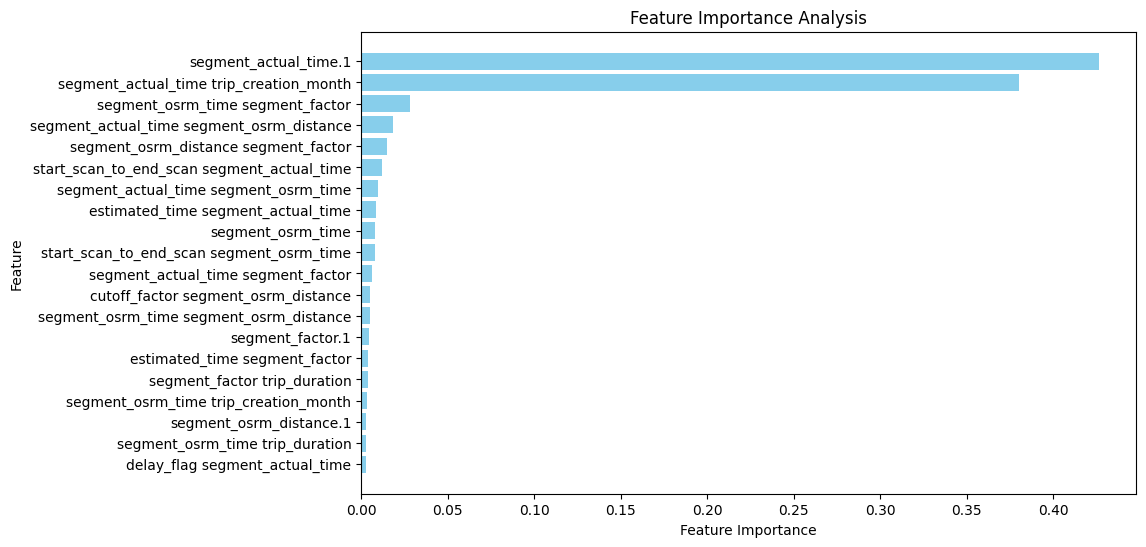

Feature importance saved as 'feature_importance.csv'.


In [ ]:
import matplotlib.pyplot as plt

# Use the Random Forest model for feature importance (if used in Stacking)
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"][:20], feature_importance_df["Importance"][:20], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.gca().invert_yaxis()
plt.show()

# Save feature importance
feature_importance_df.to_csv('feature_importance.csv', index=False)
print("Feature importance saved as 'feature_importance.csv'.")


**Visualize Residuals**

Code for Residual Plot

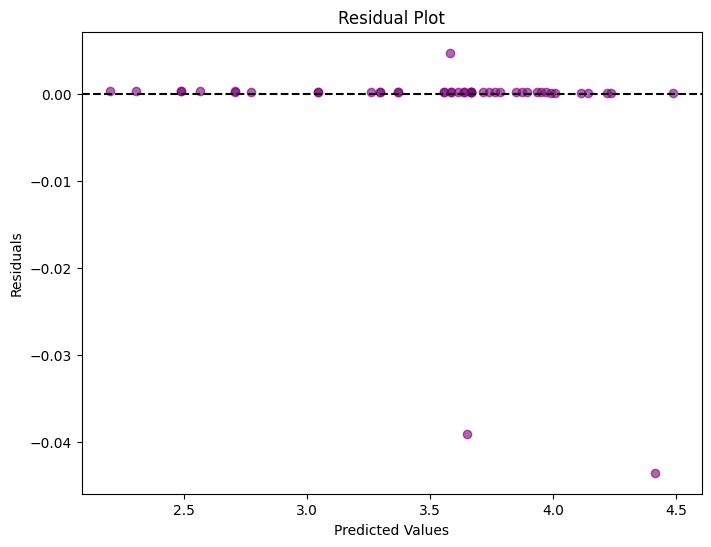

In [ ]:
# Residuals for test data
residuals = y_test - test_preds

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(test_preds, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


**Learning Curve**
A learning curve helps visualize model performance as training size increases.

Code for Learning Curve
python
Copy code


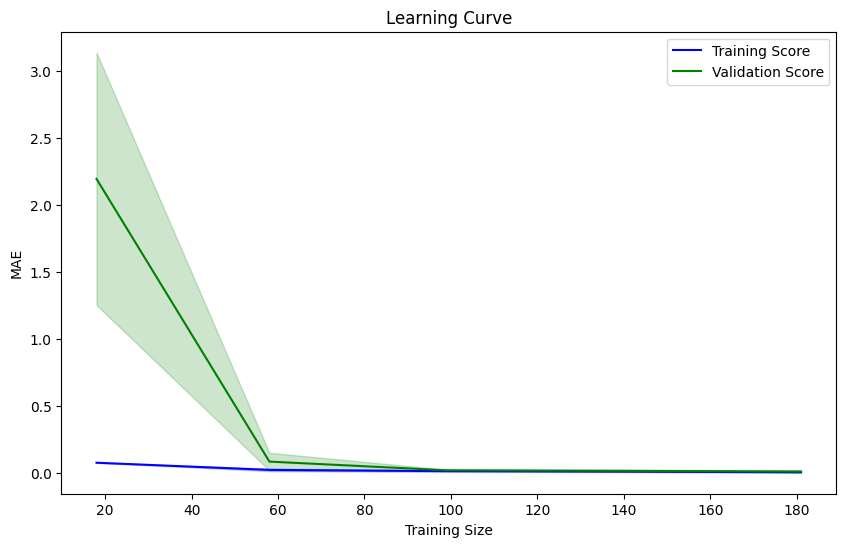

In [ ]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    stacking_model, X, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Convert scores to positive
train_scores = -train_scores
test_scores = -test_scores

# Calculate mean and std deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Validation Score", color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Learning Curve")
plt.legend()
plt.show()


**Save and Download Results**

Save all generated metrics and plots.

Save Residuals:

In [ ]:
residuals_df = pd.DataFrame({
    "Predicted": test_preds,
    "Residuals": residuals
})
residuals_df.to_csv('residuals.csv', index=False)
print("Residuals saved as 'residuals.csv'.")


Residuals saved as 'residuals.csv'.


**Download Files to Local Machine:**

In [ ]:
from google.colab import files

# Download files
files.download('performance_metrics_summary.csv')
files.download('feature_importance.csv')
files.download('residuals.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Deployment Preparation**

Save the Best Model

In [ ]:
import joblib

# Save the trained model
joblib.dump(stacking_model, 'best_model.pkl')

# Save any preprocessing steps, if used (e.g., StandardScaler, PCA)
# Assume preprocessing_pipeline contains preprocessing steps
# joblib.dump(preprocessing_pipeline, 'preprocessing_pipeline.pkl')

print("Best model saved as 'best_model.pkl'.")


Best model saved as 'best_model.pkl'.


** Create a Model Inference Pipeline**

The inference pipeline loads the saved model and applies preprocessing before making predictions.

Code for the Inference Pipeline

In [ ]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('best_model.pkl')

# If preprocessing steps were saved
# preprocessing_pipeline = joblib.load('preprocessing_pipeline.pkl')

def make_prediction(input_data):
    """
    Make predictions using the trained model.

    Args:
    input_data (pd.DataFrame): A DataFrame containing the input features.

    Returns:
    predictions (np.array): Predicted values.
    """
    # Apply preprocessing if applicable
    # processed_data = preprocessing_pipeline.transform(input_data)
    processed_data = input_data  # If no preprocessing steps

    # Make predictions
    predictions = model.predict(processed_data)
    return predictions

# Example usage of the inference function
sample_input = X_test.head(1)  # Replace with real input data
predicted_value = make_prediction(sample_input)
print("Predicted Value:", predicted_value)


Predicted Value: [3.2955787]


** Step8 Documentation for Deployment**



## Model Usage Documentation

### Model Usage

The trained model is saved as `best_model.pkl` and can be used for making predictions on new data. The following steps outline how to load the model and make predictions:

1. **Load the Model**:
   ```python
   import joblib

   # Load the saved model
   model = joblib.load('best_model.pkl')
   ```

2. **Prepare Input Data**:
   Ensure the input data is in the same format as the training data. The input data should be a pandas DataFrame with the same feature columns used during training.

3. **Make Predictions**:
   Use the loaded model to make predictions on the input data.
   ```python
- **Data Type**: The input data should be numeric (float or int) for all features.
- **Shape**: The input DataFrame should have the same number of columns as the feature matrix used during training.

#### Output Format

The output will be a numpy array containing the predicted values.

- **Data Type**: The output will be a numpy array of floats.
- **Shape**: The shape of the output array will match the number of rows in the input DataFrame.

Example Output: array([predicted_value1, predicted_value2, ... , predicted_valueN])

In [ ]:
# Open the file in write mode
with open("deployment_documentation.txt", "w") as doc_file:
    # Write documentation incrementally
    doc_file.write("### Model Usage Documentation\n\n")

    doc_file.write("#### Model Usage\n")
    doc_file.write("The trained model is saved as 'best_model.pkl' and can be used for making predictions on new data.\n")
    doc_file.write("The following steps outline how to load the model and make predictions:\n\n")

    doc_file.write("1. **Load the Model**:\n")
    doc_file.write("   ```python\n")
    doc_file.write("   import joblib\n")
    doc_file.write("   # Load the saved model\n")
    doc_file.write("   model = joblib.load('best_model.pkl')\n")
    doc_file.write("   ```\n\n")

    doc_file.write("2. **Prepare Input Data**:\n")
    doc_file.write("- Ensure the input data is in the same format as the training data.\n")
    doc_file.write("- The input data should be a pandas DataFrame with the same feature columns used during training.\n")
    doc_file.write("- **Data Type**: Numeric (float or int) for all features.\n")
    doc_file.write("- **Shape**: Input DataFrame should match the number of columns in the feature matrix used during training.\n\n")

    doc_file.write("3. **Make Predictions**:\n")
    doc_file.write("   ```python\n")
    doc_file.write("   predictions = model.predict(input_data)\n")
    doc_file.write("   ```\n")
    doc_file.write("- **Output Format**: A numpy array containing the predicted values.\n")
    doc_file.write("- **Data Type**: Float.\n")
    doc_file.write("- **Shape**: Matches the number of rows in the input DataFrame.\n")
    doc_file.write("- **Example Output**: `array([predicted_value1, predicted_value2, ..., predicted_valueN])`\n")

print("Deployment documentation saved as 'deployment_documentation.txt'.")


Deployment documentation saved as 'deployment_documentation.txt'.


**Download Documentation**

In [ ]:
from google.colab import files

# Download the documentation file
files.download("deployment_documentation.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**MODEL DEPLOYMENT**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression  # Example estimators
import pandas as pd # Import pandas to read the dataframe

# Assuming 'cleaned_and_engineered_logistics_data.csv' contains your data
data = pd.read_csv('cleaned_and_engineered_logistics_data.csv')
target_column = 'segment_actual_time'  # Replace with your actual target column name

# Define features (X) and target (y)
X = data.drop(columns=[target_column])
y = data[target_column]

# Assuming you have your features in 'X' and target in 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models (replace with your desired models)
estimators = [
    ('lr', LinearRegression()),
    # Add more base models as needed
]

# Create and fit the StackingRegressor
model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
model.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression())],
                  final_estimator=LinearRegression())